<a href="https://colab.research.google.com/github/Issey2023/Coding-dojo-Project-2-/blob/main/Project_2_Part_2_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Student: Ismaa-eel Hendricks

In [42]:
#load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing necessary tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

#Importing the Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")


## Functions



In [43]:
# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{previous exercises and code alongs}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{previous exercises and code alongs}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [44]:
#mount drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Selection

I have selected the data for:

[Stroke Prediction Data Set](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

[Car Insurance](https://www.kaggle.com/datasets/sagnik1511/car-insurance-data)












#First Choice

In [45]:
#create file path
fpath = '/content/drive/MyDrive/coding dojo week 6/coding dojo projec2 /healthcare-dataset-stroke-data.csv'
dhc = pd.read_csv(fpath)
dhc.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
--

In [46]:
#how many cases are included in the dataset
length = len(dhc)
#how many features are in the dataset
features = dhc.shape[1]-1

print ("There are "+ str(len(dhc))+" cases in this dataset")
print ("There are {}".format(features)+" features in this dataset")

There are 5110 cases in this dataset
There are 11 features in this dataset
There are 5110 cases in this dataset
There are 11 features in this dataset


##First choice: [Stroke Prediction Data Set](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

1. **Source of data**\
[www.kaggle.com](https://www.kaggle.com/)
2. **Brief description of data**\
Context:\
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.

3. **What is the target?**\
Determine if the patient will have stroke or not. If yes, then 1, else 0. The target is the variable that a patientw will have a stroke or not.

4. **What does one row represent?** (A person? A business? An event? A product?)\
Each row in the data provides relavant information about the patient.
5. **Is this a classification or regression problem?**\
This is a classification problem.

6. **How many features does the data have?**\
There are 11 features in this dataset

7. **How many rows are in the dataset?**\
There are 5110 cases in this dataset.

8. **What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset**?\
One challenge could be dealing with data imbalance, which might necessitate the identification and application of appropriate techniques and hyperparameters to effectively model the imbalanced dataset. Additionally, determining the optimal approaches for data standardization, handling missing values through imputation, and selecting appropriate modeling strategies will be crucial for achieving the highest level of prediction accuracy.

#Second choice

In [47]:
#create file path
fpath = '/content/drive/MyDrive/coding dojo week 6/coding dojo projec2 /Car_Insurance_Claim.csv'
df = pd.read_csv(fpath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  int64  
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  int64  
 11  CHILDREN             10000 non-null  int64  
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [48]:
dhc['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

0    4861
1     249
Name: stroke, dtype: int64

In [49]:
#Description of the dataset

#how many cases are included in the dataset
length = len(df)
#how many features are in the dataset
features = df.shape[1]-1

print ("There are "+ str(len(df))+" cases in this dataset")
print ("There are {}".format(features)+" features in this dataset")


There are 10000 cases in this dataset
There are 18 features in this dataset
There are 10000 cases in this dataset
There are 18 features in this dataset


In [50]:
df['OUTCOME'].value_counts()

0    6867
1    3133
Name: OUTCOME, dtype: int64

0    6867
1    3133
Name: OUTCOME, dtype: int64

##Project 2 - Part 2 (Core)

#Using the approved dataset you proposed for Project 2 - Part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

- Deleted unnecessary columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
- Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.
- Commit your file to your Github repository and submit the link below.

##First Choice Part 2

##Data Cleaning

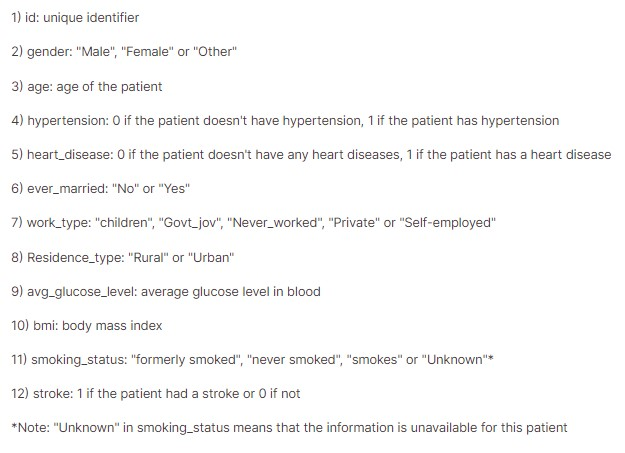

In [51]:
dhc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
--

In [52]:
#Check for missing values
dhc.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [53]:
#Make a copy so we dont break the original data set and avoid any manipulations
df = dhc.copy()

In [54]:
#Delete unnecessary columns
df = df.drop(columns = ['id', 'Residence_type'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1


,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1


##Exploare the data

In [55]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1


,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1


In [56]:
#Check the data balance
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

0    4861
1     249
Name: stroke, dtype: int64

The data set is imbalanced with a large number of cases with no stroke and a small number of cases with stroke

In [57]:
#check for missing values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [58]:
#check for duplicate values
df.duplicated().sum()

0

0

In [59]:
#Impute missing values in bmi column with median
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [60]:
#Confirm that there are no more missing values
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [61]:
#Identify inconsistencies in data for categorical values (i.e. Cat, cat, cats).
#Display value counts for categorical columns
for col in df.select_dtypes(include='object').columns:
  display(df[col].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Yes    3353
No     1757
Name: ever_married, dtype: int64

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Yes    3353
No     1757
Name: ever_married, dtype: int64

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [62]:
#Drop other from Gender
df.drop(df[df['gender'] == "Other"].index, inplace=True)

#If your applying the Analysis to adults only based on discussion with Client, you can drop ages < 18
#Remove age values less than 9 as per industry standard of testing from 9years old and up
df.drop(df[df['age'] < 9].index, inplace=True)

We see gender has an additional cat for other, however the count is one and will be dropped

---



##Produced univariate visuals for the target and all features.

##TARGET VARIABLE

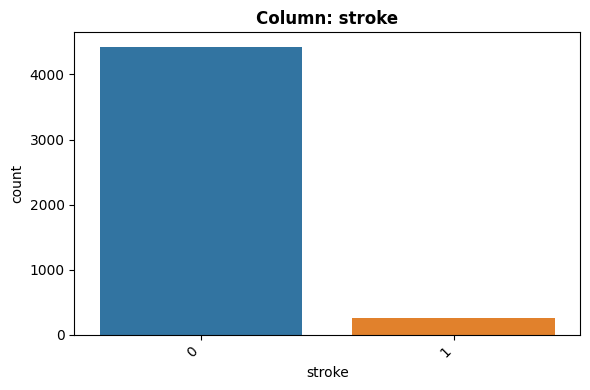

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4427 times (94.7%)
- Not constant or quasi-constant.


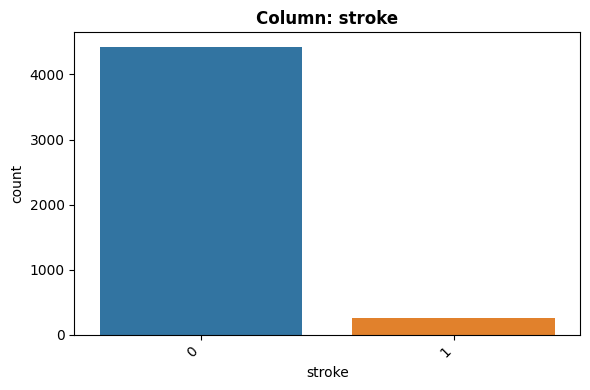

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4427 times (94.7%)
- Not constant or quasi-constant.


In [63]:
#Plot Univariate visual for gender column
explore_categorical(df, 'stroke', fillna=False);

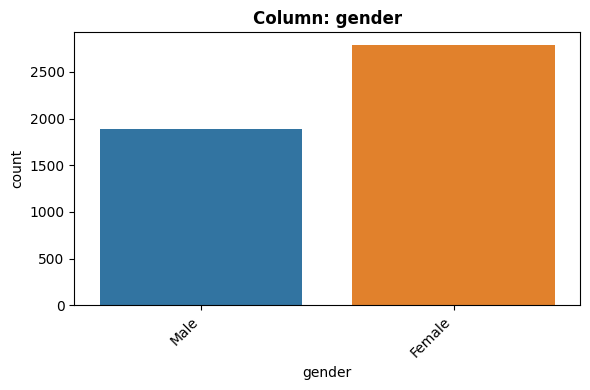

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Female' occurs 2785 times (59.57%)
- Not constant or quasi-constant.


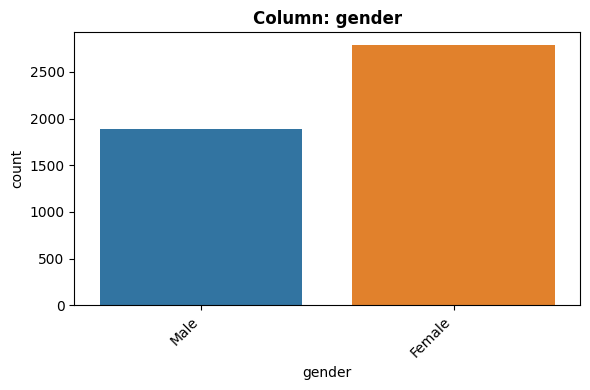

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Female' occurs 2785 times (59.57%)
- Not constant or quasi-constant.


In [64]:
#Plot Univariate visual for gender column
explore_categorical(df, 'gender', fillna=False);

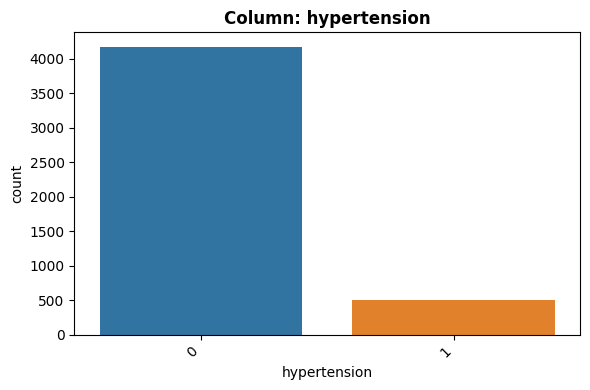

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4177 times (89.35%)
- Not constant or quasi-constant.


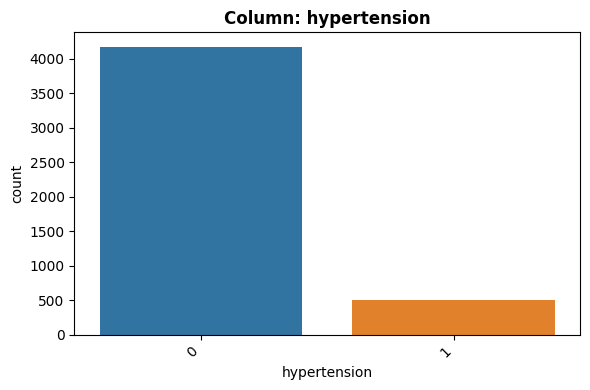

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4177 times (89.35%)
- Not constant or quasi-constant.


In [65]:
#Plot Univariate visuals for hypertension column
explore_categorical(df, 'hypertension', fillna=False);

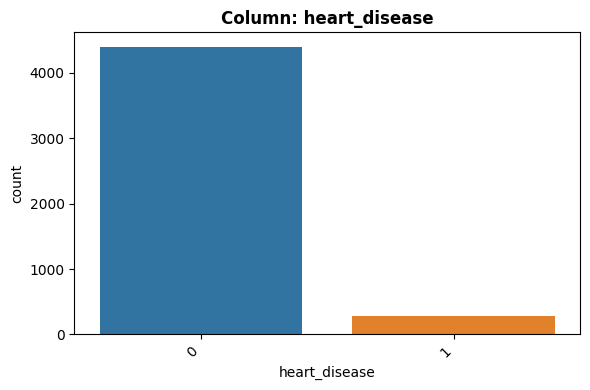

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4400 times (94.12%)
- Not constant or quasi-constant.


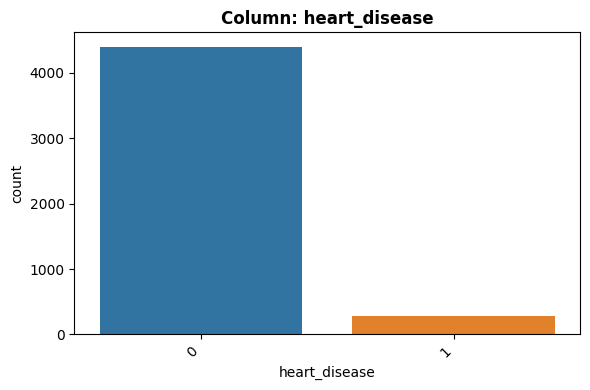

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: '0' occurs 4400 times (94.12%)
- Not constant or quasi-constant.


In [66]:
#Plot Univariate visuals for heart_disease column
explore_categorical(df, 'heart_disease', fillna=False);

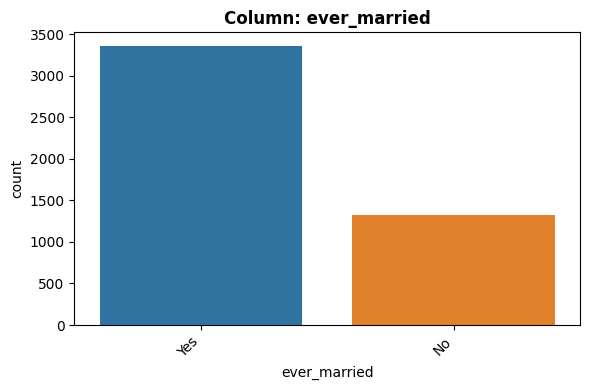

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Yes' occurs 3353 times (71.72%)
- Not constant or quasi-constant.


In [67]:
#Plot Univariate visuals for ever_married column
explore_categorical(df, 'ever_married', fillna=False);

In [68]:
#Drop other from Children from work_type
df.drop(df[df['work_type'] == "children"].index, inplace=True)

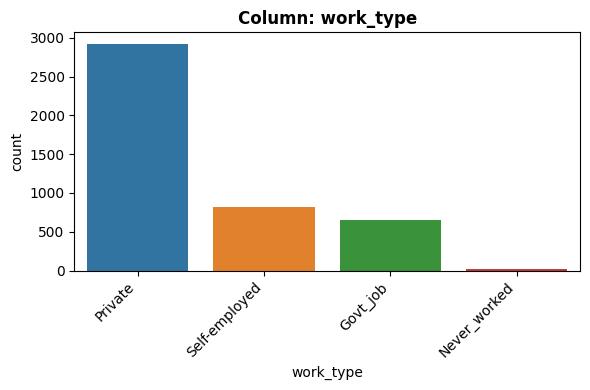

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Private' occurs 2923 times (66.13%)
- Not constant or quasi-constant.


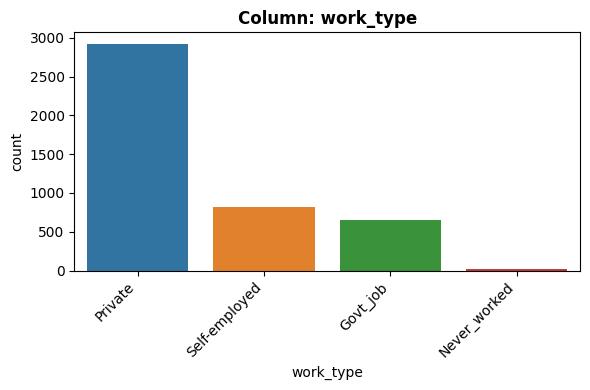

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Private' occurs 2923 times (66.13%)
- Not constant or quasi-constant.


In [69]:
#Plot Univariate visuals for ever_married column
explore_categorical(df, 'work_type', fillna=False);

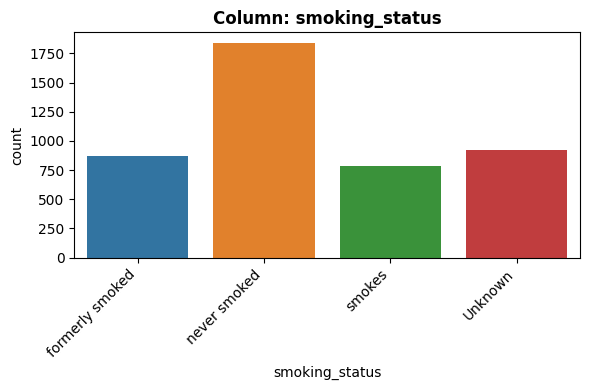

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'never smoked' occurs 1838 times (41.58%)
- Not constant or quasi-constant.


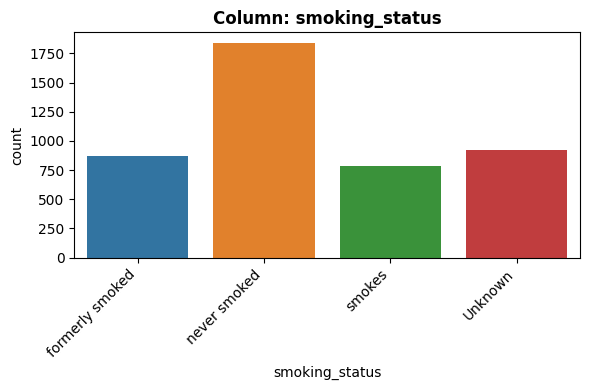

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'never smoked' occurs 1838 times (41.58%)
- Not constant or quasi-constant.


In [70]:
#Plot Univariate visuals for smoking_status column
explore_categorical(df, 'smoking_status', fillna=False);

In [71]:
from os import replace
#WE will assume those who indicated unknown as smokers.
#replace unkown with smokes
df['smoking_status'].replace('Unknown', 'smokes', inplace=True)

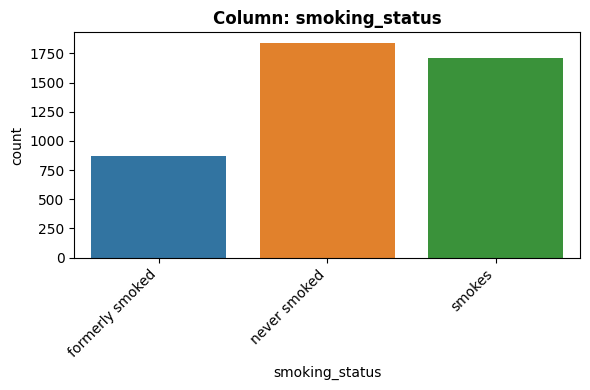

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'never smoked' occurs 1838 times (41.58%)
- Not constant or quasi-constant.


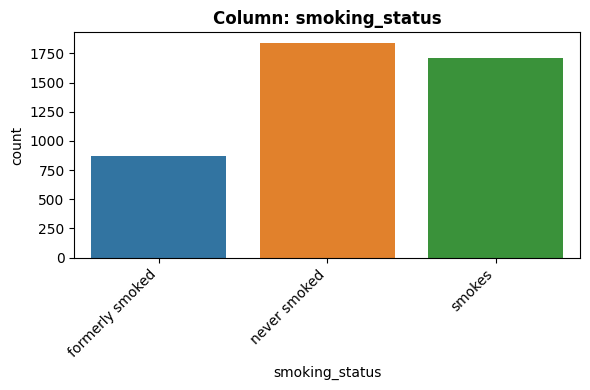

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'never smoked' occurs 1838 times (41.58%)
- Not constant or quasi-constant.


In [72]:
#Plot Univariate visuals for smoking_status column
explore_categorical(df, 'smoking_status', fillna=False);

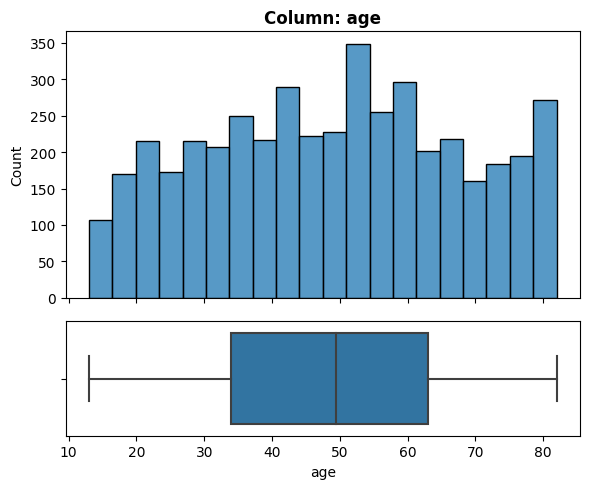

- NaN's Found: 0 (0.0%)
- Unique Values: 70
- Most common value: '78.0' occurs 102 times (2.31%)
- Not constant or quasi-constant.


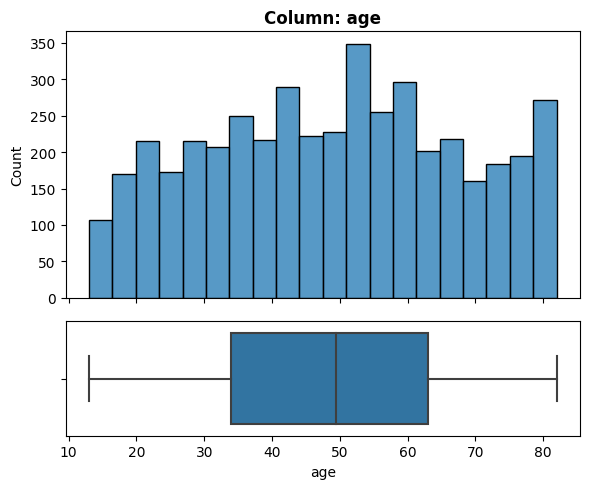

- NaN's Found: 0 (0.0%)
- Unique Values: 70
- Most common value: '78.0' occurs 102 times (2.31%)
- Not constant or quasi-constant.


In [73]:
#Plot Univariate visuals for age column
explore_numeric(df, 'age');

In [74]:
df['age'].describe()

count    4420.000000
mean       48.902036
std        18.689617
min        13.000000
25%        34.000000
50%        49.500000
75%        63.000000
max        82.000000
Name: age, dtype: float64

count    4420.000000
mean       48.902036
std        18.689617
min        13.000000
25%        34.000000
50%        49.500000
75%        63.000000
max        82.000000
Name: age, dtype: float64

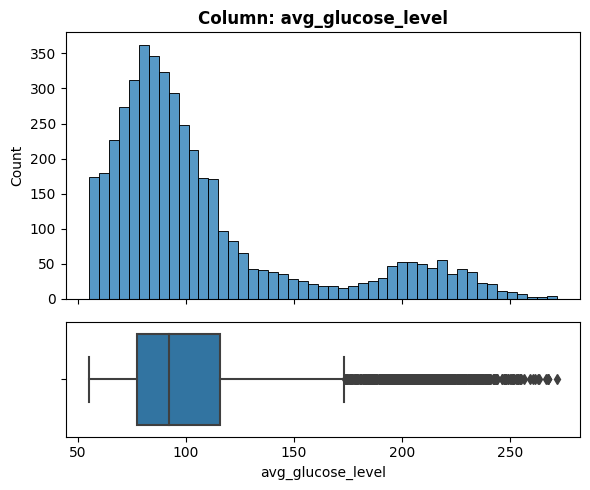

- NaN's Found: 0 (0.0%)
- Unique Values: 3588
- Most common value: '91.68' occurs 5 times (0.11%)
- Not constant or quasi-constant.


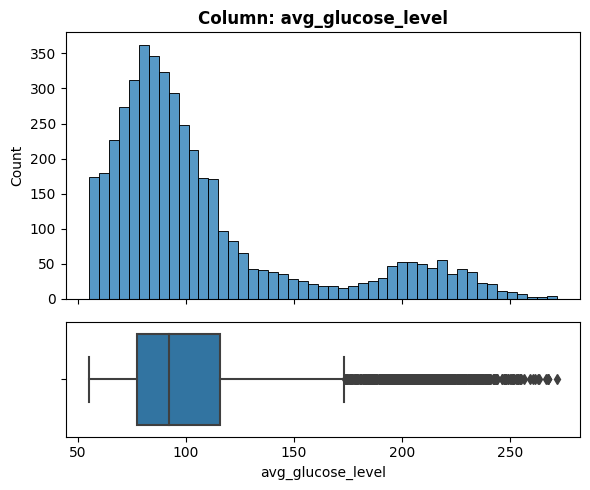

- NaN's Found: 0 (0.0%)
- Unique Values: 3588
- Most common value: '91.68' occurs 5 times (0.11%)
- Not constant or quasi-constant.


In [75]:
#Plot Univariate visuals for avg_glucose_level column
explore_numeric(df, 'avg_glucose_level');

In [76]:
df['avg_glucose_level'].describe()

count    4420.000000
mean      107.973611
std        47.275295
min        55.120000
25%        77.447500
50%        92.145000
75%       115.872500
max       271.740000
Name: avg_glucose_level, dtype: float64

count    4420.000000
mean      107.973611
std        47.275295
min        55.120000
25%        77.447500
50%        92.145000
75%       115.872500
max       271.740000
Name: avg_glucose_level, dtype: float64

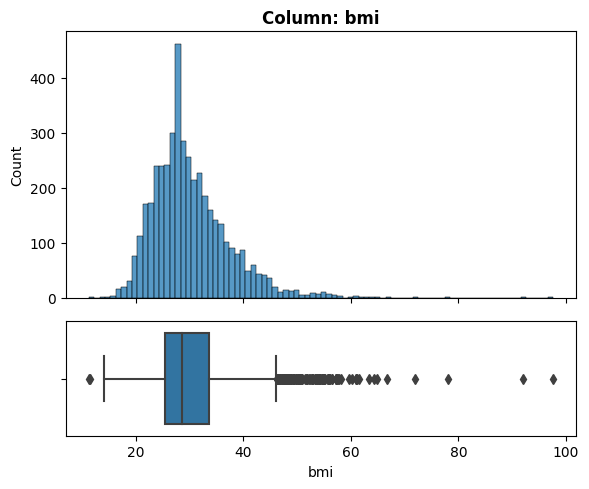

- NaN's Found: 0 (0.0%)
- Unique Values: 383
- Most common value: '28.1' occurs 214 times (4.84%)
- Not constant or quasi-constant.


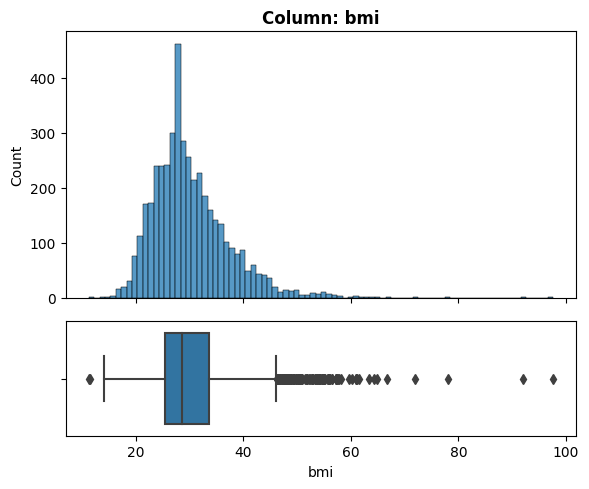

- NaN's Found: 0 (0.0%)
- Unique Values: 383
- Most common value: '28.1' occurs 214 times (4.84%)
- Not constant or quasi-constant.


In [77]:
#Plot Univariate visuals for bmi column
explore_numeric(df, 'bmi');

In [78]:
df['bmi'].describe()

count    4420.000000
mean       30.210633
std         7.190899
min        11.300000
25%        25.400000
50%        28.700000
75%        33.700000
max        97.600000
Name: bmi, dtype: float64

count    4420.000000
mean       30.210633
std         7.190899
min        11.300000
25%        25.400000
50%        28.700000
75%        33.700000
max        97.600000
Name: bmi, dtype: float64

In [79]:
df.describe().round(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4420.00,4420.00,4420.00,4420.00,4420.00,4420.00
mean,48.90,0.11,0.06,107.97,30.21,0.06
std,18.69,0.32,0.24,47.28,7.19,0.23
min,13.00,0.00,0.00,55.12,11.30,0.00
25%,34.00,0.00,0.00,77.45,25.40,0.00
50%,49.50,0.00,0.00,92.15,28.70,0.00
75%,63.00,0.00,0.00,115.87,33.70,0.00
max,82.00,1.00,1.00,271.74,97.60,1.00


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4420.00,4420.00,4420.00,4420.00,4420.00,4420.00
mean,48.90,0.11,0.06,107.97,30.21,0.06
std,18.69,0.32,0.24,47.28,7.19,0.23
min,13.00,0.00,0.00,55.12,11.30,0.00
25%,34.00,0.00,0.00,77.45,25.40,0.00
50%,49.50,0.00,0.00,92.15,28.70,0.00
75%,63.00,0.00,0.00,115.87,33.70,0.00
max,82.00,1.00,1.00,271.74,97.60,1.00


In [80]:
#If your applying the Analysis to adults only based on discussion with Client, you can drop ages < 18
#Remove age values less than 9 as per industry standard of testing from 9years old and up
df.drop(df[df['age'] < 9].index, inplace=True)

##Identify any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.

In [81]:
corr = df.corr()
corr.round(2)


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.00,0.25,0.27,0.23,0.06,0.25
hypertension,0.25,1.00,0.10,0.17,0.12,0.12
heart_disease,0.27,0.10,1.00,0.16,-0.01,0.13
avg_glucose_level,0.23,0.17,0.16,1.00,0.14,0.13
bmi,0.06,0.12,-0.01,0.14,1.00,-0.00
stroke,0.25,0.12,0.13,0.13,-0.00,1.00


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.00,0.25,0.27,0.23,0.06,0.25
hypertension,0.25,1.00,0.10,0.17,0.12,0.12
heart_disease,0.27,0.10,1.00,0.16,-0.01,0.13
avg_glucose_level,0.23,0.17,0.16,1.00,0.14,0.13
bmi,0.06,0.12,-0.01,0.14,1.00,-0.00
stroke,0.25,0.12,0.13,0.13,-0.00,1.00


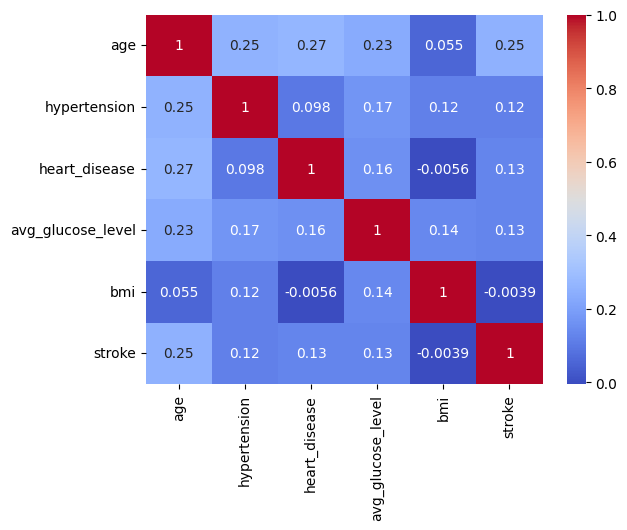

In [84]:
ax = sns.heatmap(corr, cmap = 'coolwarm', annot = True)

The graph provides a useful overview of the correlations between five different factors and stroke. The strongest correlations are between age and stroke (0.25), average glucose level and stroke (0.13), and hypertension and stroke (0.12). This suggests that older adults, people with high blood sugar, and people with hypertension are at increased risk for developing stroke.

Other correlations include heart disease and stroke (0.13) and BMI and stroke (-0.0039). This suggests that people with heart disease are also at increased risk for developing stroke, while people with a lower BMI may be at decreased risk. However, the correlation between BMI and stroke is weak, so this finding should be interpreted with caution.

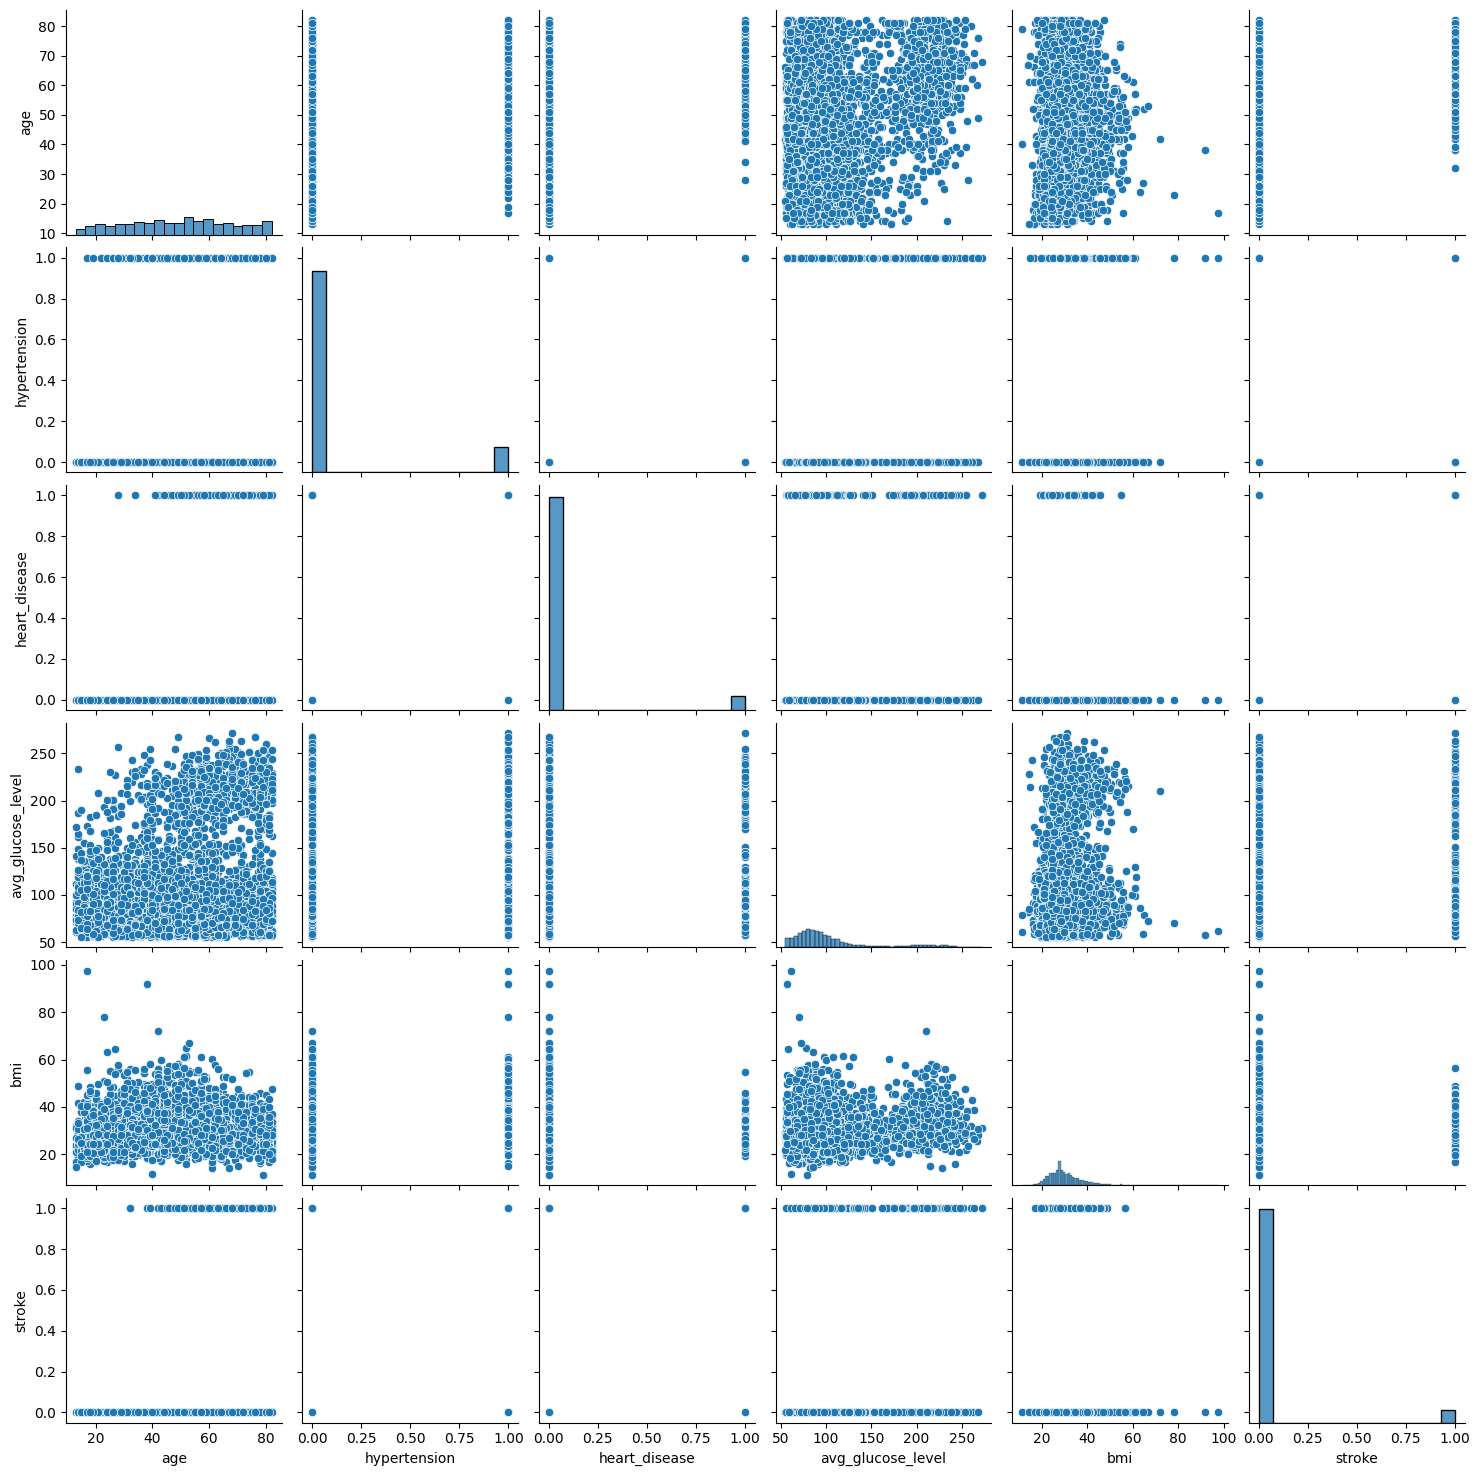

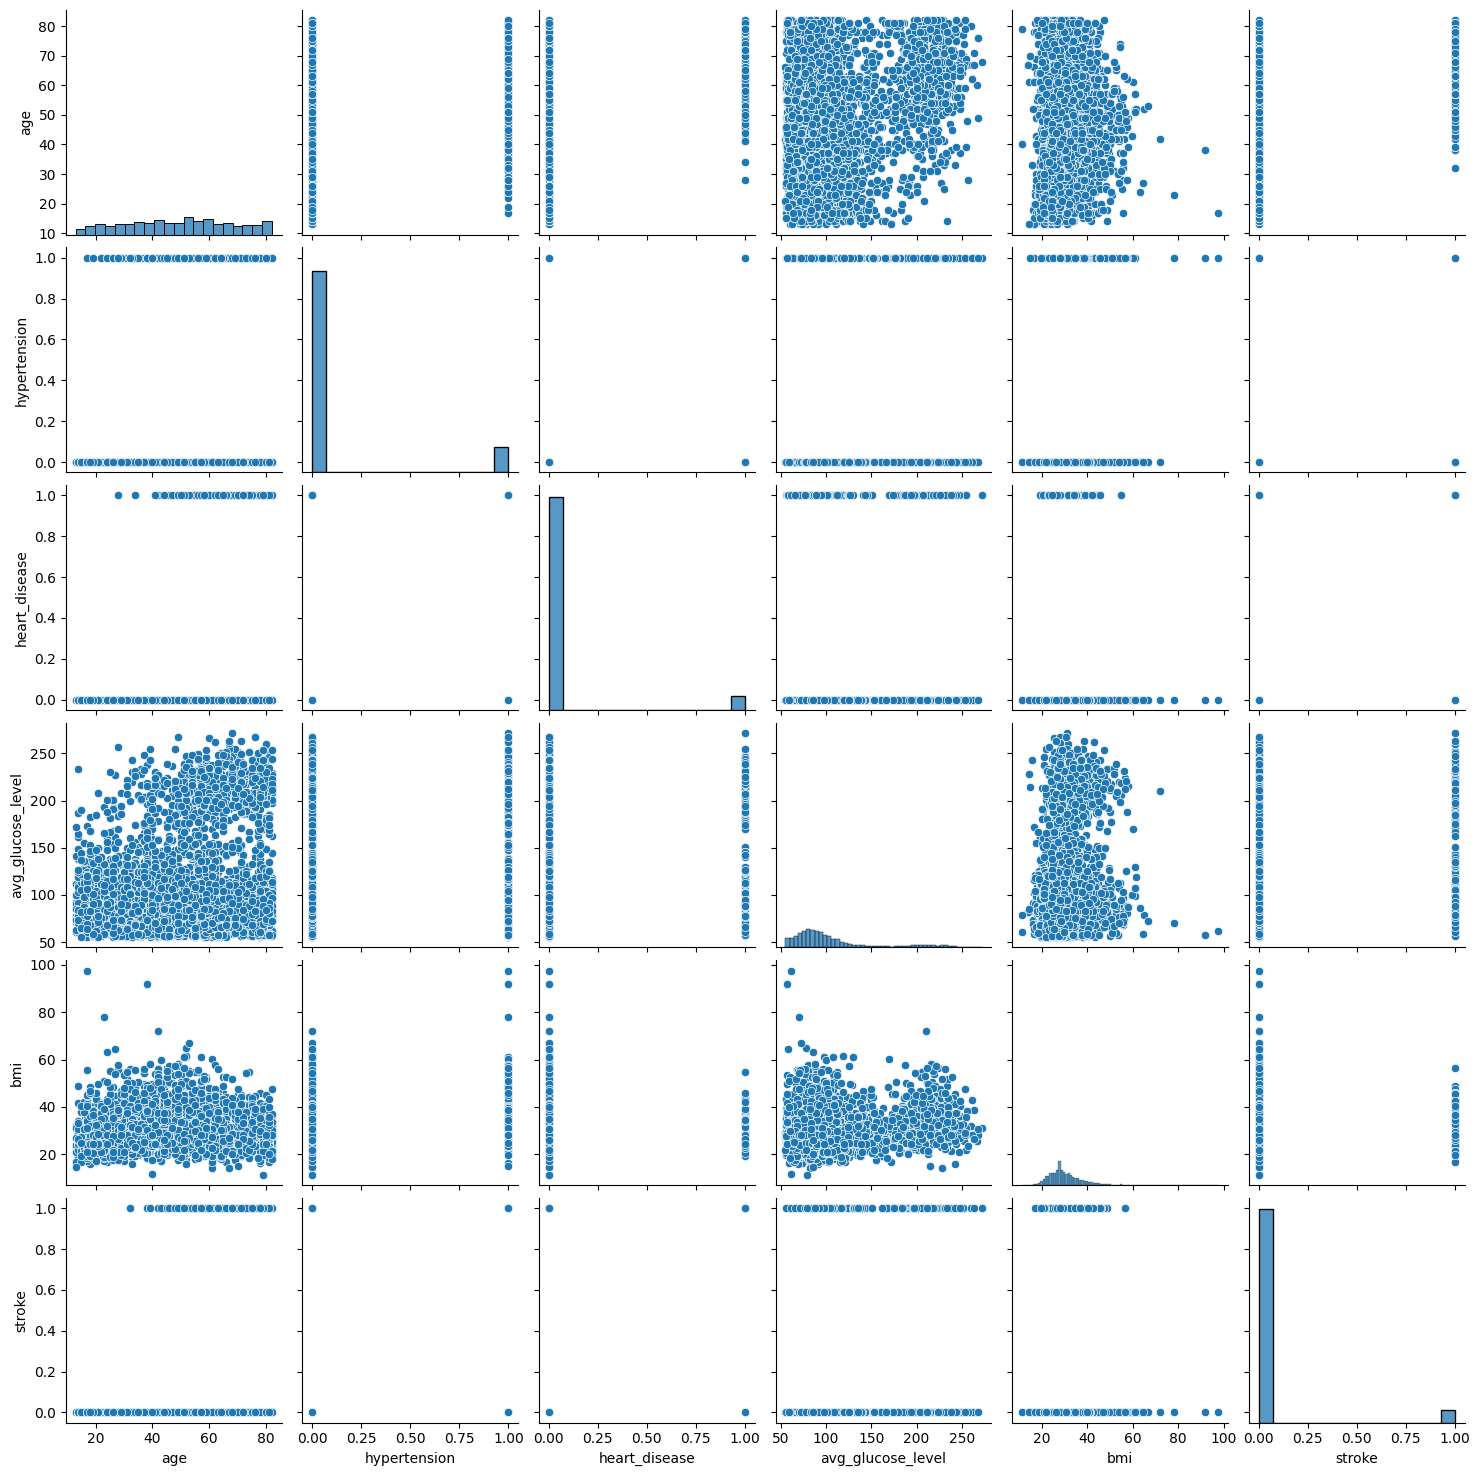

In [83]:
#Using sns pairplot to plot the relationships between all numeric variables
sns.pairplot(df);
figsize=(10,10)